In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import json
import pandas as pd
import seaborn as sns

# Original Version

In [10]:
# set the directory path
dir_path = './results_orig'
print('dir_path' , dir_path)
df_orig_small = pd.DataFrame(columns={
    'gl':[],
    'gh':[],
    'average_read_latency_per_page (ns)': [],
    'average_write_latency_per_page (ns)': [],
    '99.99%_read_latency_per_page (ns)': [],
    '99.99%_write_latency_per_page (ns)': [],
    '99.9999%_read_latency_per_page (ns)': [],
    '99.9999%_write_latency_per_page (ns)': [],
    'total_gc_time (ns)':[],
    'workload_completion_time (ns)':[],
    'erase.data.block':[],
    'user.page.moves':[]
})
df_orig_medium = pd.DataFrame(columns={
    'gl':[],
    'gh':[],
    'average_read_latency_per_page (ns)': [],
    'average_write_latency_per_page (ns)': [],
    '99.99%_read_latency_per_page (ns)': [],
    '99.99%_write_latency_per_page (ns)': [],
    '99.9999%_read_latency_per_page (ns)': [],
    '99.9999%_write_latency_per_page (ns)': [],
    'total_gc_time (ns)':[],
    'workload_completion_time (ns)':[],
    'erase.data.block':[],
    'user.page.moves':[]
})


dir_path ./results_orig


In [11]:
# loop through all the files and folders in the directory
for root, dirs, files in os.walk(dir_path):
    # record the folder name
#     print('Folder:', root)
    pattern = r"(\w+)-(\d+\.\d+)-(\d+\.\d+)"
    match = re.search(pattern, root)
    if match:
        name = match.group(1) # 'small'
        num1 = float(match.group(2)) # 0.8
        num2 = float(match.group(3)) # 0.3
#         print(name, num1, num2)
        
    # print the names of all the files in the folder
        for filename in files:
#             print('File:', filename)
            filepath = os.path.join(str(root), 'recorder.json')
        with open(filepath, 'r') as f:
            data = json.load(f)
#             print('json data',data.keys())
        avg_read_latency_per_page = data['average_read_latency_per_page (ns)']
        avg_write_latency_per_page = data['average_write_latency_per_page (ns)']
        p9999_read_latency_per_page = data['99.99%_read_latency_per_page (ns)']
        p9999_write_latency_per_page = data['99.99%_write_latency_per_page (ns)']
        p999999_read_latency_per_page = data['99.9999%_read_latency_per_page (ns)']
        p999999_write_latency_per_page = data['99.9999%_write_latency_per_page (ns)']
        total_gc_time = data['total_gc_time (ns)']
        workload_completion_time = data['workload_completion_time (ns)']

        gc_data = data['general_accumulator']['gc']
        erase_data_block = gc_data['erase.data.block']
        if 'user.page.moves' in gc_data:
            user_page_moves = gc_data['user.page.moves']
        else:
            user_page_moves = None
            
        # create a new row to add
        new_row = {'gl':num2,'gh':num1,'average_read_latency_per_page (ns)': avg_read_latency_per_page,
                   'average_write_latency_per_page (ns)': avg_write_latency_per_page, 
                  '99.99%_read_latency_per_page (ns)': p9999_read_latency_per_page,
                   '99.99%_write_latency_per_page (ns)': p9999_write_latency_per_page,
                   '99.9999%_read_latency_per_page (ns)': p999999_read_latency_per_page,
                   '99.9999%_write_latency_per_page (ns)': p999999_write_latency_per_page,
                   'total_gc_time (ns)':total_gc_time,
                   'workload_completion_time (ns)':workload_completion_time,
                   'erase.data.block':erase_data_block,
                   'user.page.moves':user_page_moves
                  }
        
        if name == 'small':
            df_orig_small = df_orig_small.append(new_row, ignore_index=True)
        elif name == 'medium':
            df_orig_medium = df_orig_medium.append(new_row, ignore_index=True)

df_orig_small['x_label'] = 'gl=' + df_orig_small['gl'].astype(str) + ',gh=' + df_orig_small['gh'].astype(str)       
df_orig_medium['x_label'] = 'gl=' + df_orig_medium['gl'].astype(str) + ',gh=' + df_orig_medium['gh'].astype(str)  
            
#         print(avg_read_latency_per_page)
#         print(avg_write_latency_per_page)
#         print(p9999_read_latency_per_page)
#         print(p9999_write_latency_per_page)
#         print(p999999_read_latency_per_page)
#         print(p999999_write_latency_per_page)
#         print(total_gc_time)
#         print(workload_completion_time)
#         print(erase_data_block)
#         print(user_page_moves)
            

C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\2434976371.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_orig_medium = df_orig_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\2434976371.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_orig_medium = df_orig_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\2434976371.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_orig_medium = df_orig_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\2434976371.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [12]:
df_orig_small

,gl,gh,average_read_latency_per_page (ns),average_write_latency_per_page (ns),99.99%_read_latency_per_page (ns),99.99%_write_latency_per_page (ns),99.9999%_read_latency_per_page (ns),99.9999%_write_latency_per_page (ns),total_gc_time (ns),workload_completion_time (ns),erase.data.block,user.page.moves,x_label
0,0.1,0.2,265739.523945,432784.684891,1721600.0,1600000.0,2019973.68,6.190940e+06,2.581800e+09,2.988076e+10,2016.0,NaN,"gl=0.1,gh=0.2"
1,0.1,0.3,250172.323656,386070.355419,2247200.0,1200000.0,2319996.24,6.081879e+06,2.829800e+09,2.729958e+10,2080.0,NaN,"gl=0.1,gh=0.3"
2,0.2,0.3,262756.663185,378456.357129,2302400.0,1200000.0,2379988.72,5.886578e+06,2.632400e+09,2.664298e+10,2128.0,NaN,"gl=0.2,gh=0.3"
3,0.1,0.4,215789.720662,346408.033425,1232400.0,1000000.0,2019896.60,6.631879e+06,3.145400e+09,2.509164e+10,2240.0,NaN,"gl=0.1,gh=0.4"
4,0.2,0.4,207622.692217,343556.185811,1523600.0,1000000.0,1769958.64,2.527516e+06,2.749300e+09,2.462038e+10,2080.0,NaN,"gl=0.2,gh=0.4"
5,0.3,0.4,208551.444535,341267.328903,1599200.0,1000000.0,1759996.24,6.481879e+06,2.957300e+09,2.464868e+10,2240.0,NaN,"gl=0.3,gh=0.4"
6,0.1,0.5,209692.628454,322198.091381,1722400.0,1000000.0,1759996.24,2.527517e+06,2.909800e+09,2.346766e+10,2080.0,NaN,"gl=0.1,gh=0.5"
7,0.2,0.5,210924.663908,317628.755730,1620000.0,1000000.0,1620000.00,2.396510e+06,3.064700e+09,2.333186e+10,2240.0,NaN,"gl=0.2,gh=0.5"
8,0.3,0.5,218973.368290,317982.894283,982400.0,1000000.0,1119977.44,5.954698e+06,2.956600e+09,2.321700e+10,2288.0,NaN,"gl=0.3,gh=0.5"
9,0.4,0.5,207682.453444,313780.264792,1220000.0,1000000.0,1220000.00,2.127517e+06,2.622000e+09,2.263954e+10,2352.0,NaN,"gl=0.4,gh=0.5"


In [13]:
df_orig_medium

,gl,gh,average_read_latency_per_page (ns),average_write_latency_per_page (ns),99.99%_read_latency_per_page (ns),99.99%_write_latency_per_page (ns),99.9999%_read_latency_per_page (ns),99.9999%_write_latency_per_page (ns),total_gc_time (ns),workload_completion_time (ns),erase.data.block,user.page.moves,x_label
0,0.1,0.2,61573.778931,331284.174584,500000.0,1000000.0,6.020000e+06,8.442003e+06,1.581652e+10,1.168384e+11,11264.0,107037.0,"gl=0.1,gh=0.2"
1,0.1,0.3,60675.516896,331258.362014,480000.0,1000000.0,3.738758e+06,8.424937e+06,1.674826e+10,1.178035e+11,11216.0,108377.0,"gl=0.1,gh=0.3"
2,0.2,0.3,60613.245747,331335.066842,480000.0,1000000.0,3.738758e+06,8.424937e+06,1.598282e+10,1.172184e+11,11680.0,116673.0,"gl=0.2,gh=0.3"
3,0.1,0.4,60686.015979,331356.159821,480000.0,1000000.0,3.701026e+06,8.424937e+06,1.809884e+10,1.193590e+11,11584.0,116281.0,"gl=0.1,gh=0.4"
4,0.2,0.4,60610.379853,331358.177993,480000.0,1000000.0,3.749764e+06,8.424936e+06,1.768848e+10,1.189427e+11,12080.0,123463.0,"gl=0.2,gh=0.4"
5,0.3,0.4,61011.673785,331335.367711,480000.0,1000000.0,3.732470e+06,8.424936e+06,1.612818e+10,1.173819e+11,12144.0,128181.0,"gl=0.3,gh=0.4"
6,0.1,0.5,60987.973525,331356.566865,480000.0,1000000.0,3.729325e+06,8.424936e+06,1.933118e+10,1.206052e+11,12032.0,127094.0,"gl=0.1,gh=0.5"
7,0.2,0.5,60713.890396,331351.234392,480000.0,1000000.0,3.734042e+06,8.424937e+06,1.793598e+10,1.191946e+11,11632.0,124257.0,"gl=0.2,gh=0.5"
8,0.3,0.5,60570.049508,330995.173467,480000.0,1000000.0,3.726181e+06,8.424936e+06,1.810052e+10,1.188593e+11,12176.0,134061.0,"gl=0.3,gh=0.5"
9,0.4,0.5,61690.401769,331099.865316,508000.0,1000000.0,5.918428e+06,8.424936e+06,1.691768e+10,1.176102e+11,12704.0,146629.0,"gl=0.4,gh=0.5"


# Parallized  Version

In [14]:
# set the directory path
dir_path = './results_para'
print('dir_path' , dir_path)
df_para_small = pd.DataFrame(columns={
    'gl':[],
    'gh':[],
    'average_read_latency_per_page (ns)': [],
    'average_write_latency_per_page (ns)': [],
    '99.99%_read_latency_per_page (ns)': [],
    '99.99%_write_latency_per_page (ns)': [],
    '99.9999%_read_latency_per_page (ns)': [],
    '99.9999%_write_latency_per_page (ns)': [],
    'total_gc_time (ns)':[],
    'workload_completion_time (ns)':[],
    'erase.data.block':[],
    'user.page.moves':[]
})
df_para_medium = pd.DataFrame(columns={
    'gl':[],
    'gh':[],
    'average_read_latency_per_page (ns)': [],
    'average_write_latency_per_page (ns)': [],
    '99.99%_read_latency_per_page (ns)': [],
    '99.99%_write_latency_per_page (ns)': [],
    '99.9999%_read_latency_per_page (ns)': [],
    '99.9999%_write_latency_per_page (ns)': [],
    'total_gc_time (ns)':[],
    'workload_completion_time (ns)':[],
    'erase.data.block':[],
    'user.page.moves':[]
})


dir_path ./results_para


In [15]:
# loop through all the files and folders in the directory
for root, dirs, files in os.walk(dir_path):
    # record the folder name
#     print('Folder:', root)
    pattern = r"(\w+)-(\d+\.\d+)-(\d+\.\d+)"
    match = re.search(pattern, root)
    if match:
        name = match.group(1) # 'small'
        num1 = float(match.group(2)) # 0.8
        num2 = float(match.group(3)) # 0.3
#         print(name, num1, num2)
        
    # print the names of all the files in the folder
        for filename in files:
#             print('File:', filename)
            filepath = os.path.join(str(root), 'recorder.json')
        with open(filepath, 'r') as f:
            data = json.load(f)
#             print('json data',data.keys())
        avg_read_latency_per_page = data['average_read_latency_per_page (ns)']
        avg_write_latency_per_page = data['average_write_latency_per_page (ns)']
        p9999_read_latency_per_page = data['99.99%_read_latency_per_page (ns)']
        p9999_write_latency_per_page = data['99.99%_write_latency_per_page (ns)']
        p999999_read_latency_per_page = data['99.9999%_read_latency_per_page (ns)']
        p999999_write_latency_per_page = data['99.9999%_write_latency_per_page (ns)']
        total_gc_time = data['total_gc_time (ns)']
        workload_completion_time = data['workload_completion_time (ns)']

        gc_data = data['general_accumulator']['gc']
        erase_data_block = gc_data['erase.data.block']
        if 'user.page.moves' in gc_data:
            user_page_moves = gc_data['user.page.moves']
        else:
            user_page_moves = None
            
        # create a new row to add
        new_row = {'gl':num2,'gh':num1,'average_read_latency_per_page (ns)': avg_read_latency_per_page,
                   'average_write_latency_per_page (ns)': avg_write_latency_per_page, 
                  '99.99%_read_latency_per_page (ns)': p9999_read_latency_per_page,
                   '99.99%_write_latency_per_page (ns)': p9999_write_latency_per_page,
                   '99.9999%_read_latency_per_page (ns)': p999999_read_latency_per_page,
                   '99.9999%_write_latency_per_page (ns)': p999999_write_latency_per_page,
                   'total_gc_time (ns)':total_gc_time,
                   'workload_completion_time (ns)':workload_completion_time,
                   'erase.data.block':erase_data_block,
                   'user.page.moves':user_page_moves
                  }
        
        if name == 'small':
            df_para_small = df_para_small.append(new_row, ignore_index=True)
        elif name == 'medium':
            df_para_medium = df_para_medium.append(new_row, ignore_index=True)

df_para_small['x_label'] = 'gl=' + df_para_small['gl'].astype(str) + ',gh=' + df_para_small['gh'].astype(str)       
df_para_medium['x_label'] = 'gl=' + df_para_medium['gl'].astype(str) + ',gh=' + df_para_medium['gh'].astype(str)  
            
#         print(avg_read_latency_per_page)
#         print(avg_write_latency_per_page)
#         print(p9999_read_latency_per_page)
#         print(p9999_write_latency_per_page)
#         print(p999999_read_latency_per_page)
#         print(p999999_write_latency_per_page)
#         print(total_gc_time)
#         print(workload_completion_time)
#         print(erase_data_block)
#         print(user_page_moves)

# df_para_small = df_para_small.drop(df_para_small.index[-1])
# df_para_medium = df_para_medium.drop(df_para_medium.index[-1])

C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\3980879983.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_para_medium = df_para_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\3980879983.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_para_medium = df_para_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\3980879983.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_para_medium = df_para_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\3980879983.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [16]:
df_para_small

,gl,gh,average_read_latency_per_page (ns),average_write_latency_per_page (ns),99.99%_read_latency_per_page (ns),99.99%_write_latency_per_page (ns),99.9999%_read_latency_per_page (ns),99.9999%_write_latency_per_page (ns),total_gc_time (ns),workload_completion_time (ns),erase.data.block,user.page.moves,x_label
0,0.1,0.2,207682.453444,313778.957103,1220000.0,1000000.0,1220000.00,2.127517e+06,3.968000e+08,2.041914e+10,2016.0,NaN,"gl=0.1,gh=0.2"
1,0.1,0.3,207682.453444,313876.240749,1220000.0,1000000.0,1220000.00,2.127517e+06,4.044000e+08,2.042994e+10,2080.0,NaN,"gl=0.1,gh=0.3"
2,0.2,0.3,207682.453444,313793.515272,1220000.0,1000000.0,1220000.00,2.127517e+06,4.270000e+08,2.044534e+10,2128.0,NaN,"gl=0.2,gh=0.3"
3,0.1,0.4,207682.453444,313881.712997,1220000.0,1000000.0,1220000.00,2.127517e+06,4.404000e+08,2.046154e+10,2240.0,NaN,"gl=0.1,gh=0.4"
4,0.2,0.4,207682.453444,313851.795135,1220000.0,1000000.0,1220000.00,2.127517e+06,4.092000e+08,2.043274e+10,2080.0,NaN,"gl=0.2,gh=0.4"
5,0.3,0.4,207682.453444,313801.634380,1220000.0,1000000.0,1220000.00,2.127517e+06,4.532000e+08,2.046474e+10,2240.0,NaN,"gl=0.3,gh=0.4"
6,0.1,0.5,207682.453444,313926.620606,1220000.0,1000000.0,1220000.00,2.127517e+06,4.076000e+08,2.043274e+10,2080.0,NaN,"gl=0.1,gh=0.5"
7,0.2,0.5,207682.453444,313829.793113,1220000.0,1000000.0,1220000.00,2.127517e+06,4.276000e+08,2.045674e+10,2240.0,NaN,"gl=0.2,gh=0.5"
8,0.3,0.5,207682.453444,313832.477785,1220000.0,1000000.0,1220000.00,2.127517e+06,4.474000e+08,2.047054e+10,2288.0,NaN,"gl=0.3,gh=0.5"
9,0.4,0.5,207682.453444,313851.001148,1220000.0,1000000.0,1220000.00,2.127517e+06,4.750000e+08,2.048734e+10,2352.0,NaN,"gl=0.4,gh=0.5"


In [17]:
df_para_medium

,gl,gh,average_read_latency_per_page (ns),average_write_latency_per_page (ns),99.99%_read_latency_per_page (ns),99.99%_write_latency_per_page (ns),99.9999%_read_latency_per_page (ns),99.9999%_write_latency_per_page (ns),total_gc_time (ns),workload_completion_time (ns),erase.data.block,user.page.moves,x_label
0,0.1,0.2,61228.416757,331156.913600,500000.0,1000000.0,3.734042e+06,8.424936e+06,8.336080e+09,1.092619e+11,11280.0,106987.0,"gl=0.1,gh=0.2"
1,0.1,0.3,60593.799623,331262.428258,480000.0,1000000.0,3.734042e+06,8.424936e+06,7.993800e+09,1.091183e+11,11184.0,108132.0,"gl=0.1,gh=0.3"
2,0.2,0.3,60695.208887,331209.188485,480000.0,1000000.0,3.738758e+06,8.424936e+06,8.899960e+09,1.099415e+11,11696.0,117263.0,"gl=0.2,gh=0.3"
3,0.1,0.4,60743.642214,331360.412767,480000.0,1000000.0,3.701026e+06,8.424936e+06,8.454220e+09,1.097151e+11,11600.0,116429.0,"gl=0.1,gh=0.4"
4,0.2,0.4,61441.627230,330855.819218,520000.0,1000000.0,3.701026e+06,8.424937e+06,1.002178e+10,1.105006e+11,12176.0,126249.0,"gl=0.2,gh=0.4"
5,0.3,0.4,61119.065474,331297.725220,500000.0,1000000.0,3.726181e+06,8.424936e+06,9.461680e+09,1.106277e+11,12160.0,128664.0,"gl=0.3,gh=0.4"
6,0.1,0.5,60591.041124,331021.772930,480000.0,1000000.0,3.734042e+06,8.424937e+06,9.590580e+09,1.104764e+11,12080.0,129113.0,"gl=0.1,gh=0.5"
7,0.2,0.5,60650.664275,331170.063581,480000.0,1000000.0,3.738758e+06,8.424936e+06,9.073140e+09,1.101118e+11,11664.0,125223.0,"gl=0.2,gh=0.5"
8,0.3,0.5,60642.590339,331345.161258,480000.0,1000000.0,3.701026e+06,8.424936e+06,9.433360e+09,1.106865e+11,12096.0,132228.0,"gl=0.3,gh=0.5"
9,0.4,0.5,61063.315773,331125.592490,500000.0,1000000.0,3.732470e+06,8.424937e+06,1.073730e+10,1.116434e+11,12688.0,146417.0,"gl=0.4,gh=0.5"


# Optimized Version

In [18]:
# set the directory path
dir_path = './results_after_opt'
print('dir_path' , dir_path)
df_opt_small = pd.DataFrame(columns={
    'gl':[],
    'gh':[],
    'average_read_latency_per_page (ns)': [],
    'average_write_latency_per_page (ns)': [],
    '99.99%_read_latency_per_page (ns)': [],
    '99.99%_write_latency_per_page (ns)': [],
    '99.9999%_read_latency_per_page (ns)': [],
    '99.9999%_write_latency_per_page (ns)': [],
    'total_gc_time (ns)':[],
    'workload_completion_time (ns)':[],
    'erase.data.block':[],
    'user.page.moves':[]
})
df_opt_medium = pd.DataFrame(columns={
    'gl':[],
    'gh':[],
    'average_read_latency_per_page (ns)': [],
    'average_write_latency_per_page (ns)': [],
    '99.99%_read_latency_per_page (ns)': [],
    '99.99%_write_latency_per_page (ns)': [],
    '99.9999%_read_latency_per_page (ns)': [],
    '99.9999%_write_latency_per_page (ns)': [],
    'total_gc_time (ns)':[],
    'workload_completion_time (ns)':[],
    'erase.data.block':[],
    'user.page.moves':[]
})


dir_path ./results_after_opt


In [19]:
# loop through all the files and folders in the directory
for root, dirs, files in os.walk(dir_path):
    # record the folder name
#     print('Folder:', root)
    pattern = r"(\w+)-(\d+\.\d+)-(\d+\.\d+)"
    match = re.search(pattern, root)
    if match:
        name = match.group(1) # 'small'
        num1 = float(match.group(2)) # 0.8
        num2 = float(match.group(3)) # 0.3
#         print(name, num1, num2)
        
    # print the names of all the files in the folder
        for filename in files:
#             print('File:', filename)
            filepath = os.path.join(str(root), 'recorder.json')
        with open(filepath, 'r') as f:
            data = json.load(f)
#             print('json data',data.keys())
        avg_read_latency_per_page = data['average_read_latency_per_page (ns)']
        avg_write_latency_per_page = data['average_write_latency_per_page (ns)']
        p9999_read_latency_per_page = data['99.99%_read_latency_per_page (ns)']
        p9999_write_latency_per_page = data['99.99%_write_latency_per_page (ns)']
        p999999_read_latency_per_page = data['99.9999%_read_latency_per_page (ns)']
        p999999_write_latency_per_page = data['99.9999%_write_latency_per_page (ns)']
        total_gc_time = data['total_gc_time (ns)']
        workload_completion_time = data['workload_completion_time (ns)']

        gc_data = data['general_accumulator']['gc']
        erase_data_block = gc_data['erase.data.block']
        if 'user.page.moves' in gc_data:
            user_page_moves = gc_data['user.page.moves']
        else:
            user_page_moves = None
            
        # create a new row to add
        new_row = {'gl':num2,'gh':num1,'average_read_latency_per_page (ns)': avg_read_latency_per_page,
                   'average_write_latency_per_page (ns)': avg_write_latency_per_page, 
                  '99.99%_read_latency_per_page (ns)': p9999_read_latency_per_page,
                   '99.99%_write_latency_per_page (ns)': p9999_write_latency_per_page,
                   '99.9999%_read_latency_per_page (ns)': p999999_read_latency_per_page,
                   '99.9999%_write_latency_per_page (ns)': p999999_write_latency_per_page,
                   'total_gc_time (ns)':total_gc_time,
                   'workload_completion_time (ns)':workload_completion_time,
                   'erase.data.block':erase_data_block,
                   'user.page.moves':user_page_moves
                  }
        
        if name == 'small':
            df_opt_small = df_opt_small.append(new_row, ignore_index=True)
        elif name == 'medium':
            df_opt_medium = df_opt_medium.append(new_row, ignore_index=True)

df_opt_small['x_label'] = 'gl=' + df_opt_small['gl'].astype(str) + ',gh=' + df_opt_small['gh'].astype(str)       
df_opt_medium['x_label'] = 'gl=' + df_opt_medium['gl'].astype(str) + ',gh=' + df_opt_medium['gh'].astype(str)  


#         print(avg_read_latency_per_page)
#         print(avg_write_latency_per_page)
#         print(p9999_read_latency_per_page)
#         print(p9999_write_latency_per_page)
#         print(p999999_read_latency_per_page)
#         print(p999999_write_latency_per_page)
#         print(total_gc_time)
#         print(workload_completion_time)
#         print(erase_data_block)
#         print(user_page_moves)

# df_opt_small = df_opt_small.drop(df_para_small.index[-1])
# df_opt_medium = df_opt_medium.drop(df_para_medium.index[-1])

C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\2722588113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_opt_medium = df_opt_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\2722588113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_opt_medium = df_opt_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\2722588113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_opt_medium = df_opt_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_29416\2722588113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [20]:
df_opt_small

,gl,gh,average_read_latency_per_page (ns),average_write_latency_per_page (ns),99.99%_read_latency_per_page (ns),99.99%_write_latency_per_page (ns),99.9999%_read_latency_per_page (ns),99.9999%_write_latency_per_page (ns),total_gc_time (ns),workload_completion_time (ns),erase.data.block,user.page.moves,x_label
0,0.1,0.2,207682.453444,313814.096514,1220000.0,1000000.0,1220000.00,2.127517e+06,3.936000e+08,2.041994e+10,2016.0,NaN,"gl=0.1,gh=0.2"
1,0.1,0.3,207682.453444,313820.264386,1220000.0,1000000.0,1220000.00,2.127517e+06,3.972000e+08,2.042754e+10,2080.0,NaN,"gl=0.1,gh=0.3"
2,0.2,0.3,207682.453444,313784.485284,1220000.0,1000000.0,1220000.00,2.127517e+06,4.166000e+08,2.043974e+10,2128.0,NaN,"gl=0.2,gh=0.3"
3,0.1,0.4,207682.453444,313915.115830,1220000.0,1000000.0,1220000.00,2.127517e+06,3.918000e+08,2.041614e+10,2000.0,NaN,"gl=0.1,gh=0.4"
4,0.2,0.4,207682.453444,313840.860160,1220000.0,1000000.0,1220000.00,2.127517e+06,3.950000e+08,2.042414e+10,2064.0,NaN,"gl=0.2,gh=0.4"
5,0.3,0.4,207682.453444,313788.223047,1220000.0,1000000.0,1220000.00,2.127517e+06,4.392000e+08,2.046194e+10,2240.0,NaN,"gl=0.3,gh=0.4"
6,0.1,0.5,207682.453444,313855.632020,1220000.0,1000000.0,1220000.00,2.127517e+06,4.158000e+08,2.044774e+10,2192.0,NaN,"gl=0.1,gh=0.5"
7,0.2,0.5,207682.453444,313832.501276,1220000.0,1000000.0,1220000.00,2.127517e+06,4.438000e+08,2.047294e+10,2320.0,NaN,"gl=0.2,gh=0.5"
8,0.3,0.5,207682.453444,313839.210689,1220000.0,1000000.0,1220000.00,2.127517e+06,4.400000e+08,2.047034e+10,2304.0,NaN,"gl=0.3,gh=0.5"
9,0.4,0.5,207682.453444,313896.853992,1220000.0,1000000.0,1220000.00,2.127517e+06,4.706000e+08,2.048854e+10,2352.0,NaN,"gl=0.4,gh=0.5"


# Plot altogether

## GC Overheads

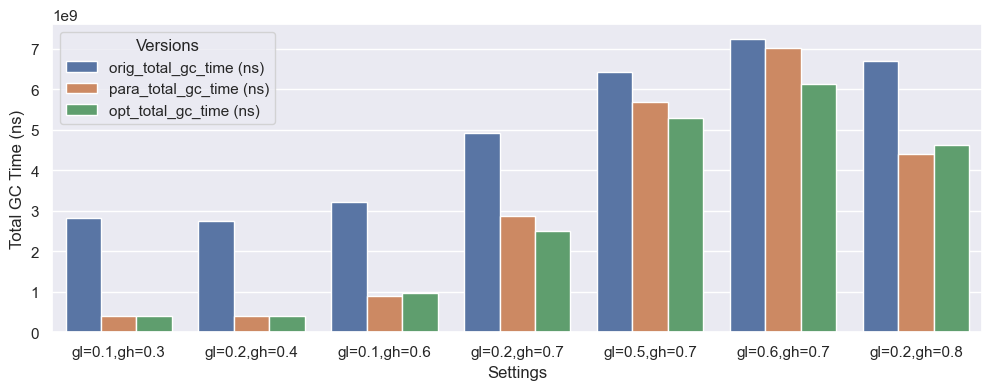

In [64]:
# Rename
# df_orig_small = df_orig_small.rename(columns={'total_gc_time (ns)':'orig_total_gc_time (ns)'})
# df_para_small = df_para_small.rename(columns={'total_gc_time (ns)':'para_total_gc_time (ns)'})
# df_opt_small = df_opt_small.rename(columns={'total_gc_time (ns)':'opt_total_gc_time (ns)'})


orig_subset =  df_orig_small.loc[[1,4,10,16,19,20,22]]
para_subset =  df_para_small.loc[[1,4,10,16,19,20,22]]
opt_subset =  df_opt_small.loc[[1,4,10,16,19,20,22]]

orig_subset = orig_subset.rename(columns={'x_label':'Settings'})

# concatenate dataframes
df_concat = pd.concat([orig_subset['Settings'], orig_subset['orig_total_gc_time (ns)'], para_subset['para_total_gc_time (ns)'], opt_subset['opt_total_gc_time (ns)']], axis=1)

# melt dataframe to long format
df_melt = pd.melt(df_concat, id_vars=['Settings'], value_vars=['orig_total_gc_time (ns)', 'para_total_gc_time (ns)', 'opt_total_gc_time (ns)'],
                  var_name='Versions', value_name='Total GC Time (ns)')

# plot data using seaborn
sns.barplot(x='Settings', y='Total GC Time (ns)', hue='Versions', data=df_melt)
sns.set(rc={'figure.figsize':(12,4)})

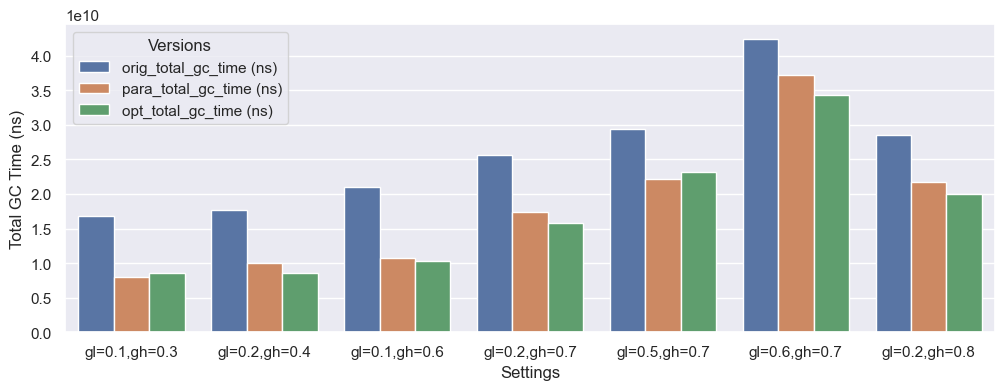

In [66]:
# Rename
df_orig_medium = df_orig_medium.rename(columns={'total_gc_time (ns)':'orig_total_gc_time (ns)'})
df_para_medium = df_para_medium.rename(columns={'total_gc_time (ns)':'para_total_gc_time (ns)'})
df_opt_medium = df_opt_medium.rename(columns={'total_gc_time (ns)':'opt_total_gc_time (ns)'})


orig_subset =  df_orig_medium.loc[[1,4,10,16,19,20,22]]
para_subset =  df_para_medium.loc[[1,4,10,16,19,20,22]]
opt_subset =  df_opt_medium.loc[[1,4,10,16,19,20,22]]

orig_subset = orig_subset.rename(columns={'x_label':'Settings'})

# concatenate dataframes
df_concat = pd.concat([orig_subset['Settings'], orig_subset['orig_total_gc_time (ns)'], para_subset['para_total_gc_time (ns)'], opt_subset['opt_total_gc_time (ns)']], axis=1)

# melt dataframe to long format
df_melt = pd.melt(df_concat, id_vars=['Settings'], value_vars=['orig_total_gc_time (ns)', 'para_total_gc_time (ns)', 'opt_total_gc_time (ns)'],
                  var_name='Versions', value_name='Total GC Time (ns)')

# plot data using seaborn
sns.barplot(x='Settings', y='Total GC Time (ns)', hue='Versions', data=df_melt)
sns.set(rc={'figure.figsize':(12,4)})

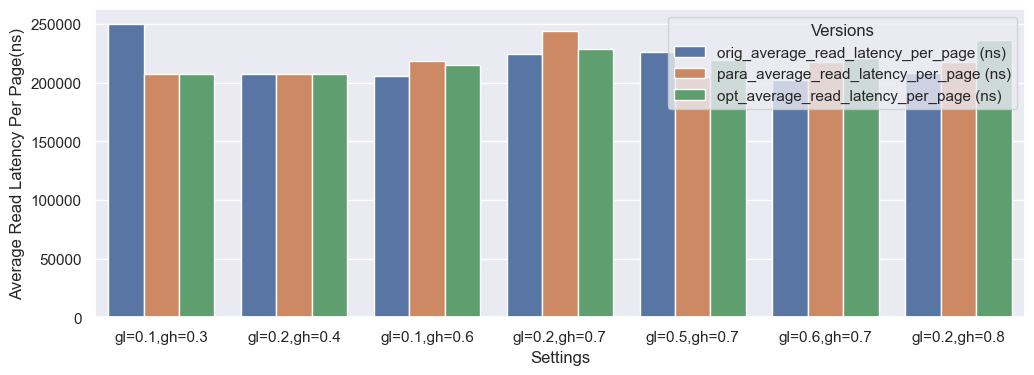

In [70]:
# Rename
df_orig_small = df_orig_small.rename(columns={'average_read_latency_per_page (ns)':'orig_average_read_latency_per_page (ns)'})
df_para_small = df_para_small.rename(columns={'average_read_latency_per_page (ns)':'para_average_read_latency_per_page (ns)'})
df_opt_small = df_opt_small.rename(columns={'average_read_latency_per_page (ns)':'opt_average_read_latency_per_page (ns)'})


orig_subset =  df_orig_small.loc[[1,4,10,16,19,20,22]]
para_subset =  df_para_small.loc[[1,4,10,16,19,20,22]]
opt_subset =  df_opt_small.loc[[1,4,10,16,19,20,22]]

orig_subset = orig_subset.rename(columns={'x_label':'Settings'})

# concatenate dataframes
df_concat = pd.concat([orig_subset['Settings'], orig_subset['orig_average_read_latency_per_page (ns)'], para_subset['para_average_read_latency_per_page (ns)'], opt_subset['opt_average_read_latency_per_page (ns)']], axis=1)

# melt dataframe to long format
df_melt = pd.melt(df_concat, id_vars=['Settings'], value_vars=['orig_average_read_latency_per_page (ns)', 'para_average_read_latency_per_page (ns)', 'opt_average_read_latency_per_page (ns)'],
                  var_name='Versions', value_name='Average Read Latency Per Page(ns)')

# plot data using seaborn
sns.barplot(x='Settings', y='Average Read Latency Per Page(ns)', hue='Versions', data=df_melt)
sns.set(rc={'figure.figsize':(12,4)})


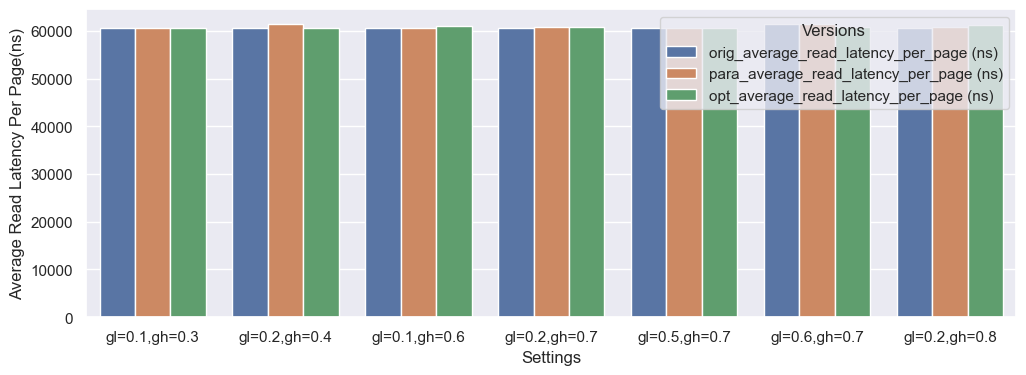

In [69]:
# Rename
df_orig_medium = df_orig_medium.rename(columns={'average_read_latency_per_page (ns)':'orig_average_read_latency_per_page (ns)'})
df_para_medium = df_para_medium.rename(columns={'average_read_latency_per_page (ns)':'para_average_read_latency_per_page (ns)'})
df_opt_medium = df_opt_medium.rename(columns={'average_read_latency_per_page (ns)':'opt_average_read_latency_per_page (ns)'})


orig_subset =  df_orig_medium.loc[[1,4,10,16,19,20,22]]
para_subset =  df_para_medium.loc[[1,4,10,16,19,20,22]]
opt_subset =  df_opt_medium.loc[[1,4,10,16,19,20,22]]

orig_subset = orig_subset.rename(columns={'x_label':'Settings'})

# concatenate dataframes
df_concat = pd.concat([orig_subset['Settings'], orig_subset['orig_average_read_latency_per_page (ns)'], para_subset['para_average_read_latency_per_page (ns)'], opt_subset['opt_average_read_latency_per_page (ns)']], axis=1)

# melt dataframe to long format
df_melt = pd.melt(df_concat, id_vars=['Settings'], value_vars=['orig_average_read_latency_per_page (ns)', 'para_average_read_latency_per_page (ns)', 'opt_average_read_latency_per_page (ns)'],
                  var_name='Versions', value_name='Average Read Latency Per Page(ns)')

# plot data using seaborn
sns.barplot(x='Settings', y='Average Read Latency Per Page(ns)', hue='Versions', data=df_melt)
sns.set(rc={'figure.figsize':(12,4)})

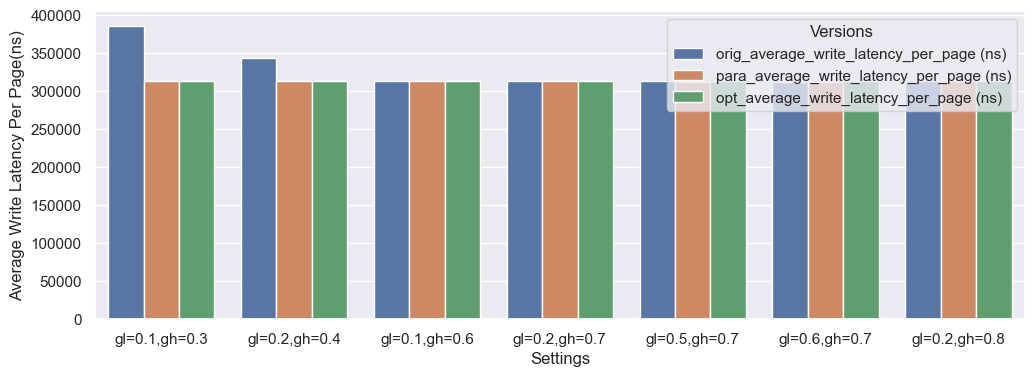

In [71]:
# Rename
df_orig_small = df_orig_small.rename(columns={'average_write_latency_per_page (ns)':'orig_average_write_latency_per_page (ns)'})
df_para_small = df_para_small.rename(columns={'average_write_latency_per_page (ns)':'para_average_write_latency_per_page (ns)'})
df_opt_small = df_opt_small.rename(columns={'average_write_latency_per_page (ns)':'opt_average_write_latency_per_page (ns)'})


orig_subset =  df_orig_small.loc[[1,4,10,16,19,20,22]]
para_subset =  df_para_small.loc[[1,4,10,16,19,20,22]]
opt_subset =  df_opt_small.loc[[1,4,10,16,19,20,22]]

orig_subset = orig_subset.rename(columns={'x_label':'Settings'})

# concatenate dataframes
df_concat = pd.concat([orig_subset['Settings'], orig_subset['orig_average_write_latency_per_page (ns)'], para_subset['para_average_write_latency_per_page (ns)'], opt_subset['opt_average_write_latency_per_page (ns)']], axis=1)

# melt dataframe to long format
df_melt = pd.melt(df_concat, id_vars=['Settings'], value_vars=['orig_average_write_latency_per_page (ns)', 'para_average_write_latency_per_page (ns)', 'opt_average_write_latency_per_page (ns)'],
                  var_name='Versions', value_name='Average Write Latency Per Page(ns)')

# plot data using seaborn
sns.barplot(x='Settings', y='Average Write Latency Per Page(ns)', hue='Versions', data=df_melt)
sns.set(rc={'figure.figsize':(12,4)})


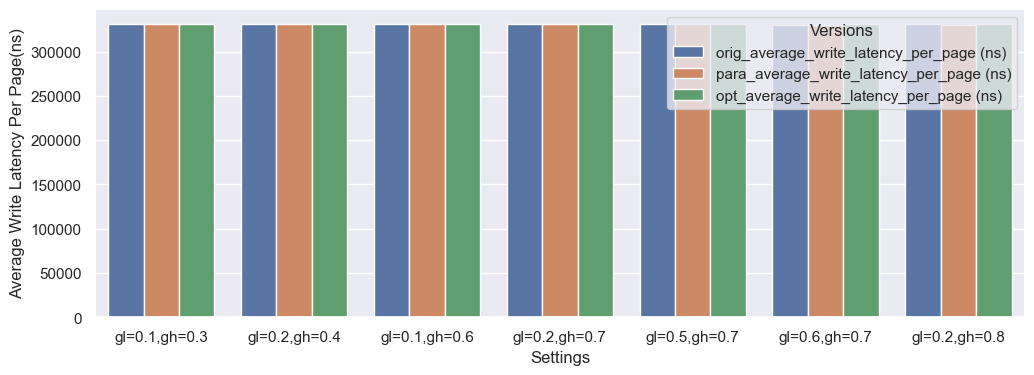

In [72]:
# Rename
df_orig_medium = df_orig_medium.rename(columns={'average_write_latency_per_page (ns)':'orig_average_write_latency_per_page (ns)'})
df_para_medium = df_para_medium.rename(columns={'average_write_latency_per_page (ns)':'para_average_write_latency_per_page (ns)'})
df_opt_medium = df_opt_medium.rename(columns={'average_write_latency_per_page (ns)':'opt_average_write_latency_per_page (ns)'})


orig_subset =  df_orig_medium.loc[[1,4,10,16,19,20,22]]
para_subset =  df_para_medium.loc[[1,4,10,16,19,20,22]]
opt_subset =  df_opt_medium.loc[[1,4,10,16,19,20,22]]

orig_subset = orig_subset.rename(columns={'x_label':'Settings'})

# concatenate dataframes
df_concat = pd.concat([orig_subset['Settings'], orig_subset['orig_average_write_latency_per_page (ns)'], para_subset['para_average_write_latency_per_page (ns)'], opt_subset['opt_average_write_latency_per_page (ns)']], axis=1)

# melt dataframe to long format
df_melt = pd.melt(df_concat, id_vars=['Settings'], value_vars=['orig_average_write_latency_per_page (ns)', 'para_average_write_latency_per_page (ns)', 'opt_average_write_latency_per_page (ns)'],
                  var_name='Versions', value_name='Average Write Latency Per Page(ns)')

# plot data using seaborn
sns.barplot(x='Settings', y='Average Write Latency Per Page(ns)', hue='Versions', data=df_melt)
sns.set(rc={'figure.figsize':(12,4)})


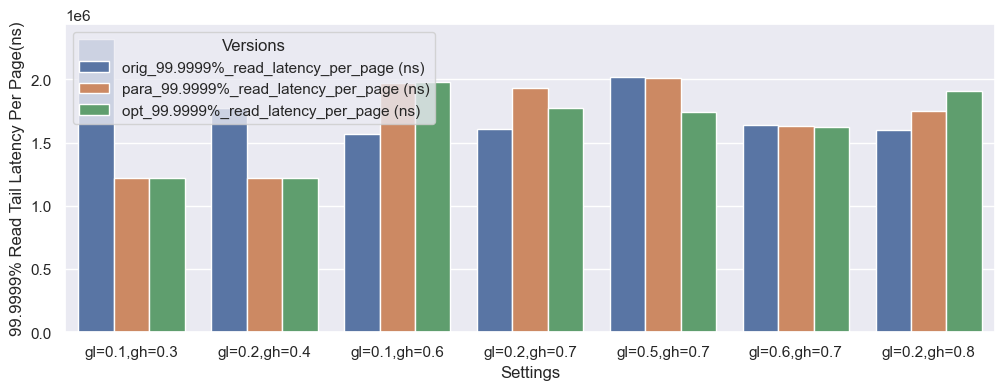

In [79]:
# Rename
df_orig_small = df_orig_small.rename(columns={'99.9999%_read_latency_per_page (ns)':'orig_99.9999%_read_latency_per_page (ns)'})
df_para_small = df_para_small.rename(columns={'99.9999%_read_latency_per_page (ns)':'para_99.9999%_read_latency_per_page (ns)'})
df_opt_small = df_opt_small.rename(columns={'99.9999%_read_latency_per_page (ns)':'opt_99.9999%_read_latency_per_page (ns)'})


orig_subset =  df_orig_small.loc[[1,4,10,16,19,20,22]]
para_subset =  df_para_small.loc[[1,4,10,16,19,20,22]]
opt_subset =  df_opt_small.loc[[1,4,10,16,19,20,22]]

orig_subset = orig_subset.rename(columns={'x_label':'Settings'})

# concatenate dataframes
df_concat = pd.concat([orig_subset['Settings'], orig_subset['orig_99.9999%_read_latency_per_page (ns)'], para_subset['para_99.9999%_read_latency_per_page (ns)'], opt_subset['opt_99.9999%_read_latency_per_page (ns)']], axis=1)

# melt dataframe to long format
df_melt = pd.melt(df_concat, id_vars=['Settings'], value_vars=['orig_99.9999%_read_latency_per_page (ns)', 'para_99.9999%_read_latency_per_page (ns)', 'opt_99.9999%_read_latency_per_page (ns)'],
                  var_name='Versions', value_name='99.9999% Read Tail Latency Per Page(ns)')

# plot data using seaborn
sns.barplot(x='Settings', y='99.9999% Read Tail Latency Per Page(ns)', hue='Versions', data=df_melt)
sns.set(rc={'figure.figsize':(12,4)})


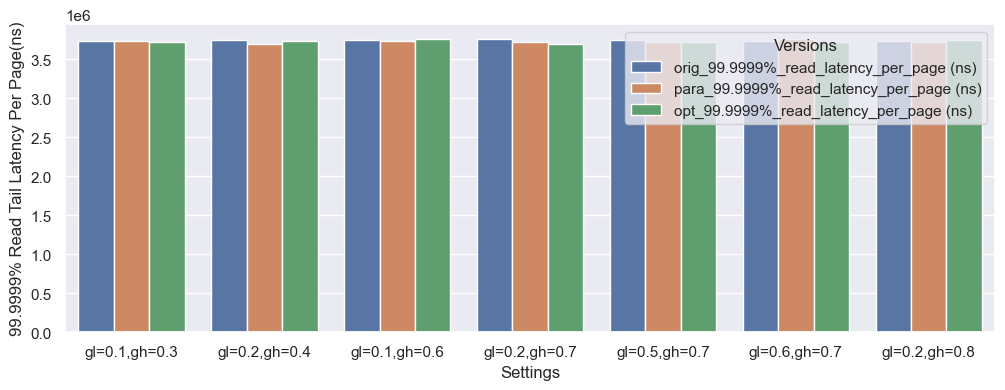

In [80]:
# Rename
df_orig_medium = df_orig_medium.rename(columns={'99.9999%_read_latency_per_page (ns)':'orig_99.9999%_read_latency_per_page (ns)'})
df_para_medium = df_para_medium.rename(columns={'99.9999%_read_latency_per_page (ns)':'para_99.9999%_read_latency_per_page (ns)'})
df_opt_medium = df_opt_medium.rename(columns={'99.9999%_read_latency_per_page (ns)':'opt_99.9999%_read_latency_per_page (ns)'})


orig_subset =  df_orig_medium.loc[[1,4,10,16,19,20,22]]
para_subset =  df_para_medium.loc[[1,4,10,16,19,20,22]]
opt_subset =  df_opt_medium.loc[[1,4,10,16,19,20,22]]

orig_subset = orig_subset.rename(columns={'x_label':'Settings'})

# concatenate dataframes
df_concat = pd.concat([orig_subset['Settings'], orig_subset['orig_99.9999%_read_latency_per_page (ns)'], para_subset['para_99.9999%_read_latency_per_page (ns)'], opt_subset['opt_99.9999%_read_latency_per_page (ns)']], axis=1)

# melt dataframe to long format
df_melt = pd.melt(df_concat, id_vars=['Settings'], value_vars=['orig_99.9999%_read_latency_per_page (ns)', 'para_99.9999%_read_latency_per_page (ns)', 'opt_99.9999%_read_latency_per_page (ns)'],
                  var_name='Versions', value_name='99.9999% Read Tail Latency Per Page(ns)')

# plot data using seaborn
sns.barplot(x='Settings', y='99.9999% Read Tail Latency Per Page(ns)', hue='Versions', data=df_melt)
sns.set(rc={'figure.figsize':(12,4)})


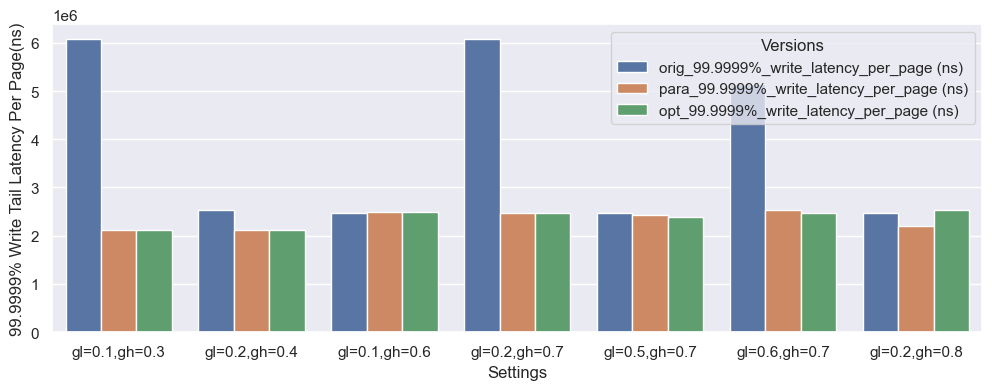

In [81]:
# Rename
df_orig_small = df_orig_small.rename(columns={'99.9999%_write_latency_per_page (ns)':'orig_99.9999%_write_latency_per_page (ns)'})
df_para_small = df_para_small.rename(columns={'99.9999%_write_latency_per_page (ns)':'para_99.9999%_write_latency_per_page (ns)'})
df_opt_small = df_opt_small.rename(columns={'99.9999%_write_latency_per_page (ns)':'opt_99.9999%_write_latency_per_page (ns)'})


orig_subset =  df_orig_small.loc[[1,4,10,16,19,20,22]]
para_subset =  df_para_small.loc[[1,4,10,16,19,20,22]]
opt_subset =  df_opt_small.loc[[1,4,10,16,19,20,22]]

orig_subset = orig_subset.rename(columns={'x_label':'Settings'})

# concatenate dataframes
df_concat = pd.concat([orig_subset['Settings'], orig_subset['orig_99.9999%_write_latency_per_page (ns)'], para_subset['para_99.9999%_write_latency_per_page (ns)'], opt_subset['opt_99.9999%_write_latency_per_page (ns)']], axis=1)

# melt dataframe to long format
df_melt = pd.melt(df_concat, id_vars=['Settings'], value_vars=['orig_99.9999%_write_latency_per_page (ns)', 'para_99.9999%_write_latency_per_page (ns)', 'opt_99.9999%_write_latency_per_page (ns)'],
                  var_name='Versions', value_name='99.9999% Write Tail Latency Per Page(ns)')

# plot data using seaborn
sns.barplot(x='Settings', y='99.9999% Write Tail Latency Per Page(ns)', hue='Versions', data=df_melt)
sns.set(rc={'figure.figsize':(12,4)})


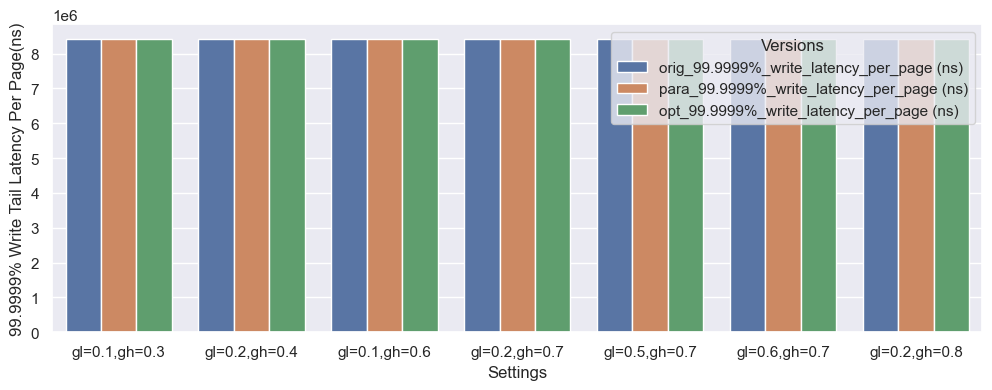

In [82]:
# Rename
df_orig_medium = df_orig_medium.rename(columns={'99.9999%_write_latency_per_page (ns)':'orig_99.9999%_write_latency_per_page (ns)'})
df_para_medium = df_para_medium.rename(columns={'99.9999%_write_latency_per_page (ns)':'para_99.9999%_write_latency_per_page (ns)'})
df_opt_medium = df_opt_medium.rename(columns={'99.9999%_write_latency_per_page (ns)':'opt_99.9999%_write_latency_per_page (ns)'})


orig_subset =  df_orig_medium.loc[[1,4,10,16,19,20,22]]
para_subset =  df_para_medium.loc[[1,4,10,16,19,20,22]]
opt_subset =  df_opt_medium.loc[[1,4,10,16,19,20,22]]

orig_subset = orig_subset.rename(columns={'x_label':'Settings'})

# concatenate dataframes
df_concat = pd.concat([orig_subset['Settings'], orig_subset['orig_99.9999%_write_latency_per_page (ns)'], para_subset['para_99.9999%_write_latency_per_page (ns)'], opt_subset['opt_99.9999%_write_latency_per_page (ns)']], axis=1)

# melt dataframe to long format
df_melt = pd.melt(df_concat, id_vars=['Settings'], value_vars=['orig_99.9999%_write_latency_per_page (ns)', 'para_99.9999%_write_latency_per_page (ns)', 'opt_99.9999%_write_latency_per_page (ns)'],
                  var_name='Versions', value_name='99.9999% Write Tail Latency Per Page(ns)')

# plot data using seaborn
sns.barplot(x='Settings', y='99.9999% Write Tail Latency Per Page(ns)', hue='Versions', data=df_melt)
sns.set(rc={'figure.figsize':(12,4)})


In [36]:
df_para_small

,gl,gh,average_read_latency_per_page (ns),average_write_latency_per_page (ns),99.99%_read_latency_per_page (ns),99.99%_write_latency_per_page (ns),99.9999%_read_latency_per_page (ns),99.9999%_write_latency_per_page (ns),para_total_gc_time (ns),workload_completion_time (ns),erase.data.block,user.page.moves,x_label
0,0.1,0.2,265739.523945,432784.684891,1721600.0,1600000.0,2019973.68,6.190940e+06,2.581800e+09,2.988076e+10,2016.0,NaN,"gl=0.1,gh=0.2"
1,0.1,0.3,250172.323656,386070.355419,2247200.0,1200000.0,2319996.24,6.081879e+06,2.829800e+09,2.729958e+10,2080.0,NaN,"gl=0.1,gh=0.3"
2,0.2,0.3,262756.663185,378456.357129,2302400.0,1200000.0,2379988.72,5.886578e+06,2.632400e+09,2.664298e+10,2128.0,NaN,"gl=0.2,gh=0.3"
3,0.1,0.4,215789.720662,346408.033425,1232400.0,1000000.0,2019896.60,6.631879e+06,3.145400e+09,2.509164e+10,2240.0,NaN,"gl=0.1,gh=0.4"
4,0.2,0.4,207622.692217,343556.185811,1523600.0,1000000.0,1769958.64,2.527516e+06,2.749300e+09,2.462038e+10,2080.0,NaN,"gl=0.2,gh=0.4"
5,0.3,0.4,208551.444535,341267.328903,1599200.0,1000000.0,1759996.24,6.481879e+06,2.957300e+09,2.464868e+10,2240.0,NaN,"gl=0.3,gh=0.4"
6,0.1,0.5,209692.628454,322198.091381,1722400.0,1000000.0,1759996.24,2.527517e+06,2.909800e+09,2.346766e+10,2080.0,NaN,"gl=0.1,gh=0.5"
7,0.2,0.5,210924.663908,317628.755730,1620000.0,1000000.0,1620000.00,2.396510e+06,3.064700e+09,2.333186e+10,2240.0,NaN,"gl=0.2,gh=0.5"
8,0.3,0.5,218973.368290,317982.894283,982400.0,1000000.0,1119977.44,5.954698e+06,2.956600e+09,2.321700e+10,2288.0,NaN,"gl=0.3,gh=0.5"
9,0.4,0.5,207682.453444,313780.264792,1220000.0,1000000.0,1220000.00,2.127517e+06,2.622000e+09,2.263954e+10,2352.0,NaN,"gl=0.4,gh=0.5"


In [31]:
df_para_medium['para_total_gc_time (ns)']

0     1.581652e+10
1     1.674826e+10
2     1.598282e+10
3     1.809884e+10
4     1.768848e+10
5     1.612818e+10
6     1.933118e+10
7     1.793598e+10
8     1.810052e+10
9     1.691768e+10
10    2.107246e+10
11    1.920530e+10
12    2.013662e+10
13    1.815930e+10
14    1.713456e+10
15    2.585960e+10
16    2.565050e+10
17    2.640110e+10
18    2.660380e+10
19    2.942278e+10
20    4.245300e+10
21    2.646254e+10
22    2.860144e+10
23    3.045704e+10
24    3.292814e+10
25    4.089370e+10
26    5.031944e+10
Name: para_total_gc_time (ns), dtype: float64

AttributeError: module 'seaborn' has no attribute 'set_xlabel'

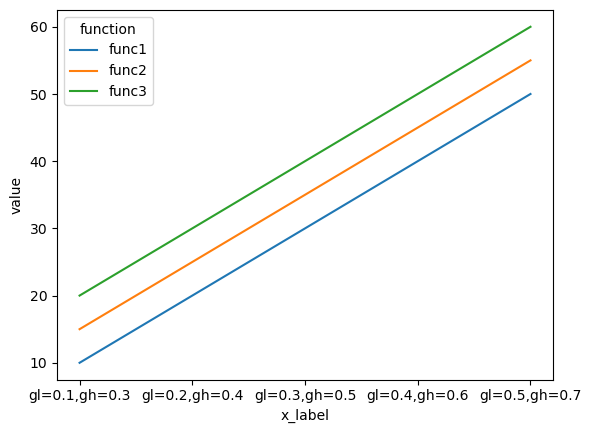

In [12]:
# import seaborn as sns
# import pandas as pd

# Create a sample DataFrame
df = pd.DataFrame({
    'gl': [0.1, 0.2, 0.3, 0.4, 0.5],
    'gh': [0.3, 0.4, 0.5, 0.6, 0.7],
    'func1': [10, 20, 30, 40, 50],
    'func2': [15, 25, 35, 45, 55],
    'func3': [20, 30, 40, 50, 60]
})

# Add a new column with custom x-axis labels
df['x_label'] = 'gl=' + df['gl'].astype(str) + ',gh=' + df['gh'].astype(str)

# Melt the DataFrame to long format
df_melt = pd.melt(df, id_vars=['x_label'], value_vars=['func1', 'func2', 'func3'],
                  var_name='function', value_name='value')

# Plot the data using seaborn
sns.lineplot(x='x_label', y='value', hue='function', data=df_melt)

# Set the x-axis label
sns.set_xlabel('Custom X-Label')


In [40]:
df_small

,gl,gh,average_read_latency_per_page (ns),average_write_latency_per_page (ns),99.99%_read_latency_per_page (ns),99.99%_write_latency_per_page (ns),99.9999%_read_latency_per_page (ns),99.9999%_write_latency_per_page (ns),total_gc_time (ns),workload_completion_time (ns),erase.data.block,user.page.moves
0,0.3,0.8,208172.708045,313841.489246,1211200.0,1000000.0,1399966.16,2.478390e+06,5.568760e+09,2.560020e+10,3152.0,133954.0
1,0.1,0.6,214927.445078,313854.954974,1265600.0,1000000.0,1979928.56,2.494765e+06,9.794400e+08,2.101314e+10,2176.0,13490.0
2,0.2,0.7,228593.478632,313838.302143,1576000.0,1000000.0,1769971.80,2.478390e+06,2.491420e+09,2.252286e+10,2320.0,54034.0
3,0.6,0.8,194279.997875,311944.992406,1332400.0,1000000.0,1609992.48,2.519329e+06,1.194546e+10,3.162790e+10,3592.0,276661.0
4,0.2,0.8,236187.631393,313851.082557,1643200.0,1000000.0,1909968.04,2.527517e+06,4.625080e+09,2.465818e+10,2960.0,109901.0
5,0.4,0.6,214205.494189,313628.151531,1622400.0,1000000.0,1640000.00,2.470201e+06,1.723420e+09,2.171044e+10,2464.0,24683.0
6,0.5,0.7,218969.320897,313101.294315,1589200.0,1000000.0,1739998.12,2.380134e+06,5.288920e+09,2.518262e+10,2880.0,112592.0
7,0.3,0.6,205208.840637,313854.636969,1239600.0,1000000.0,1639979.32,2.471142e+06,1.465840e+09,2.149798e+10,2352.0,23718.0
8,0.3,0.4,207682.453444,313788.223047,1220000.0,1000000.0,1220000.00,2.127517e+06,4.392000e+08,2.046194e+10,2240.0,NaN
9,0.1,0.5,207682.453444,313855.632020,1220000.0,1000000.0,1220000.00,2.127517e+06,4.158000e+08,2.044774e+10,2192.0,NaN


In [41]:
df_medium

,gl,gh,average_read_latency_per_page (ns),average_write_latency_per_page (ns),99.99%_read_latency_per_page (ns),99.99%_write_latency_per_page (ns),99.9999%_read_latency_per_page (ns),99.9999%_write_latency_per_page (ns),total_gc_time (ns),workload_completion_time (ns),erase.data.block,user.page.moves
0,0.4,0.6,60695.693597,331089.105129,480000.0,1000000.0,3.701026e+06,8.424936e+06,1.111444e+10,1.120662e+11,12640.0,162287.0
1,0.5,0.6,60733.077759,331256.123241,500000.0,1000000.0,3.726181e+06,8.424936e+06,1.206598e+10,1.132288e+11,13120.0,182086.0
2,0.1,0.2,60632.645353,331349.288724,480000.0,1000000.0,3.726181e+06,8.424936e+06,7.669200e+09,1.089179e+11,11056.0,104511.0
3,0.2,0.4,60645.370366,331367.067187,480000.0,1000000.0,3.732470e+06,8.424936e+06,8.595540e+09,1.098535e+11,11472.0,117203.0
4,0.3,0.7,60609.394902,330747.288733,480000.0,1000000.0,3.732470e+06,8.424937e+06,1.772224e+10,1.183455e+11,13056.0,339163.0
5,0.1,0.8,61332.803891,331371.503204,500000.0,1000000.0,3.726181e+06,8.424936e+06,1.756334e+10,1.188596e+11,12458.0,368003.0
6,0.1,0.6,60984.033815,331358.690786,488000.0,1000000.0,3.763914e+06,8.424937e+06,1.027798e+10,1.115519e+11,13056.0,153322.0
7,0.3,0.4,60680.842867,331327.663005,480000.0,1000000.0,3.738758e+06,8.424936e+06,9.397520e+09,1.106105e+11,12096.0,128180.0
8,0.1,0.4,60659.990860,331165.319146,480000.0,1000000.0,3.729325e+06,8.424937e+06,8.895140e+09,1.099289e+11,11760.0,118674.0
9,0.4,0.8,60776.137612,331353.260750,490000.0,1000000.0,3.763914e+06,8.424937e+06,2.696392e+10,1.282357e+11,14540.0,606564.0


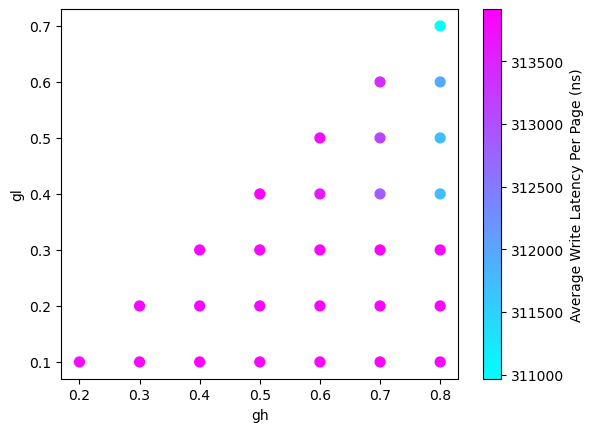

In [44]:
# create a scatter plot with 'Temperature' and 'Pressure' on the X and Y axes
plt.scatter(df_small['gh'], df_small['gl'], s=50, c=df_small['average_write_latency_per_page (ns)'], cmap='cool')
plt.xlabel('gh')
plt.ylabel('gl')
plt.colorbar(label='Average Write Latency Per Page (ns)')
plt.show()

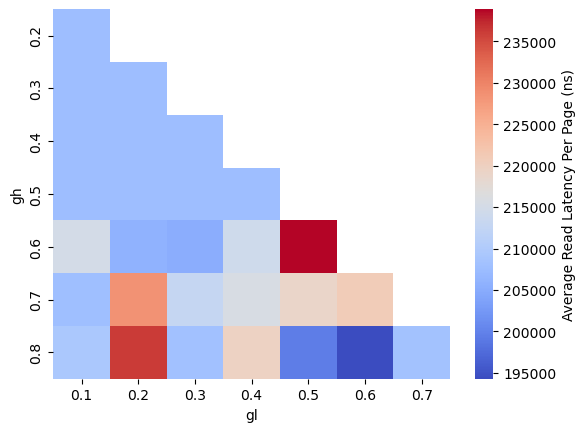

In [72]:
heatmap_data = df_small.pivot('gh', 'gl', 'average_read_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Read Latency Per Page (ns)'})
plt.show()

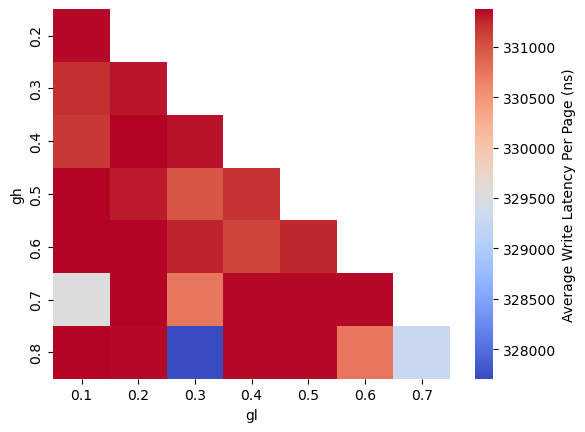

In [63]:
heatmap_data = df_medium.pivot('gh', 'gl', 'average_write_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Write Latency Per Page (ns)'})
plt.show()

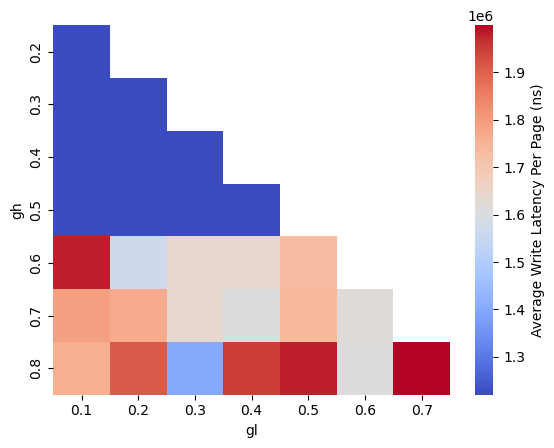

In [69]:
heatmap_data = df_small.pivot('gh', 'gl', '99.9999%_read_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Write Latency Per Page (ns)'})#,vmin = 0.95e6, vmax=1.05e6)
plt.show()